<a href="https://colab.research.google.com/github/josepeon/calculus_parsons/blob/main/chain_rule_regression_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Composition and the Chain Rule

As you may have guessed, once we apply the idea of differentiation to simple curves, we'd like to use this method in more and more general situations.  This notebook explores the use of differentiation and derivatives to explore functions formed by composition, and to use these results to differentiate implicitly defined functions.

**GOALS**:

- Identify situations where chain rule is of use

- Define and Use Chain Rule

- Use Chain Rule to differentiate implicitly defined functions

- Use Descartes algorithm to explore alternative approach to differentation

In [ ]:
import sympy as sy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### WARM UP

Find the derivative of the following functions:

1. $\frac{1}{3}x^3 - \frac{5}{2}x^2 + 4x$
2. $x + e^x - \frac{1}{x}$
3. $2t^4 - 10t^2 + 13t$
4. $\frac{1}{\sqrt{x}} + \frac{1}{x}$
5. Find all critical points for $x^3 - \frac{1}{2}x^2 - 2x + 1$

In [ ]:
x = sy.Symbol('x')
sy.diff(1/3*x**3 - 5/2*x**2 + 4*x, x)

1.0*x**2 - 5.0*x + 4

In [ ]:
sy.diff(x + sy.exp(x) - 1/x, x)

exp(x) + 1 + x**(-2)

In [ ]:
sy.diff(2*x**4 - 10*x**2 + 13*x, x)

8*x**3 - 20*x + 13

In [ ]:
sy.diff(1/sy.sqrt(x) + 1/x, x)

-1/x**2 - 1/(2*x**(3/2))

In [ ]:
#take derivative
dx = sy.diff(x**3 - 1/2*x**2 - 2*x + 1, x)
#set equal to zero
eq = sy.Eq(dx, 0)
#solve
sy.solve(eq, x)

[-0.666666666666667, 1.00000000000000]

#### Extrema

For each of the following functions find the absolute maximum or minimum over the given interval.

1. $f(x) = -x^2 + 3x - 2$ over [1, 3]
2. $f(x) = x^2 - 3x^{2/3}$ over [0, 2]

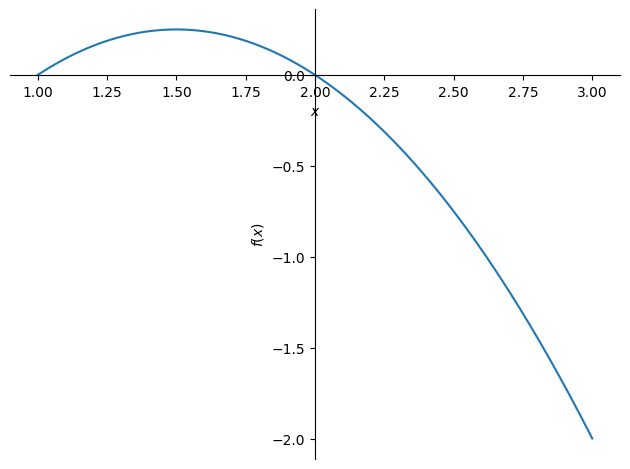

In [ ]:
x = sy.Symbol('x')
#x = np.linspace(1, 3, 100)
def f(x): return  -x**2 + 3*x - 2
sy.plot(f(x), (x, 1, 3))

In [ ]:
def f(x): return x**2 - 3*x**(2/3)
sy.plot(f(x), (x, 0, 2));

In [ ]:
eq = sy.Eq(sy.diff(f(x)), 0)
sy.solve(eq, x)

### AP Calculus Free Response

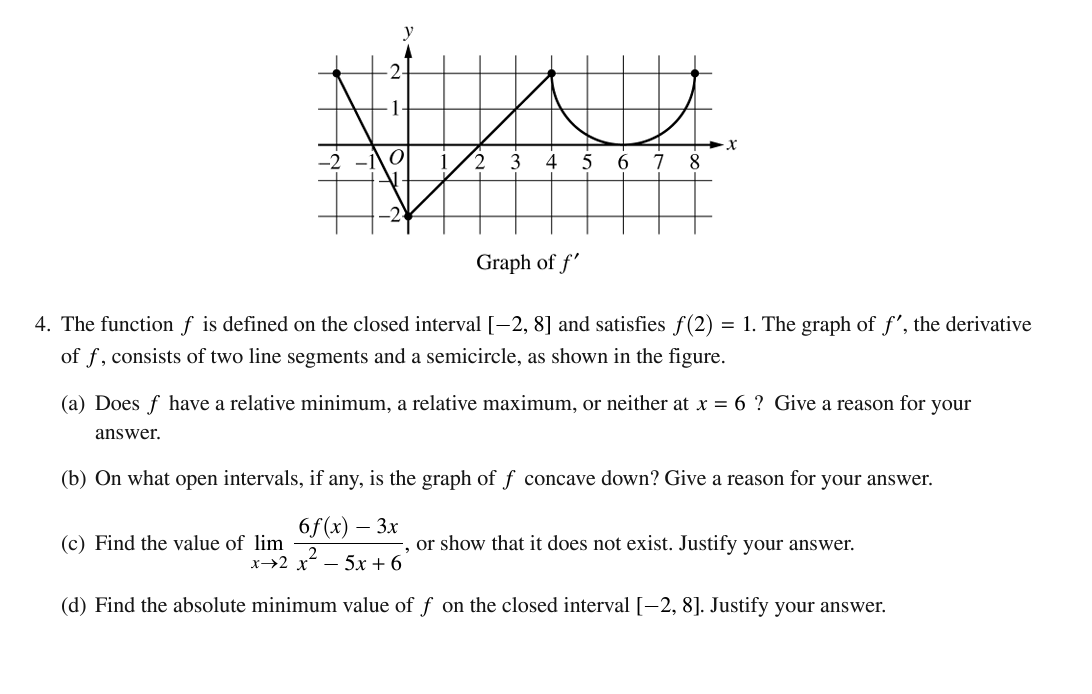

## Composition of Functions

Functions can be formed by combining other functions through famililar operations.  For example, we can consider the polynomial $h(x) = x^3 + x^2$ as formed by two simpler polynomials $f(x) = x^3$ and $g(x) = x^2$ combined through addition.  So far, we have not had to worry about this, as differentiation and integration are linear operators that work across addition and subtraction.

If we instead have a function $h$ given by:

$$h(x) = \sqrt{x^3 + x^2}$$

we may recognize the square root function and the polynomial inside of it.  This was not formed by addition, subtraction, multiplication, or division of simpler functions however.  Instead, we can understand the function $h$ as formed by **composing** two functions $f$ and $g$ where:

$$h(x) = \sqrt{x^3 + x^2} \quad f(u) = \sqrt(u) \quad g(x) = x^3 + x^2$$

The operation of composition means we apply the function $f$ to the function $g$.  We would write this as

$$f(g(x)) = \sqrt{(g(x))} = \sqrt{x^3 + x^2}$$


We can use SymPy to explore a few examples and determine a general rule for differentiating functions formed by compositions.  We begin with trying to generalize the situation above, where we compose some function $g$ into a function $f$ of the form

$$f(x) = (g(x))^n$$

It seems reasonable to expect that

$$f'(x) = n(g(x))^{n-1}$$

You need to adjust this statement to make it true.  Consider the following examples, use sympy to differentiate them and determine the remaining terms.

1. $(x^2 - 3x)^2$

2. $(x^2 - 3x)^3$

3. $\sqrt{x^2 - 3x}$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

In [ ]:
x = sy.Symbol('x')
y1 = (x**2 - 3*x)**2
y2 = (x**2 - 3*x)**3
y3 = (x**2 - 3*x)**(1/2)

In [ ]:
#differentiate y1 with respect to x
sy.diff(y1, x)
#returns resulting expression in factored form
#this matters to our specific problem and looking
#for some kind of structure in the expression
sy.factor(sy.diff(y1, x))
sy.diff(y1, x)

In [ ]:
#derivative of y2
sy.diff(y2, x)

In [ ]:
#derivative of y3
sy.diff(y3, x)

Now consider the examples for $f(x) = \sin(g(x))$:

1. $\sin{2x}$

2. $\sin{(\frac{1}{2}x + 3)}$

3. $\sin{(x^2)}$

Write down what you think the derivative of each expression should be?  Use `sympy` to examine the derivatives and identify a rule for finding the derivatives of each expression.

In [ ]:
# sy.diff(sy.sin(2*x), x)

In [ ]:
# sy.diff(sy.sin(1/2*x + 3), x)

In [ ]:
# sy.diff(sy.sin(x**2), x)

#### Problems

Use paper and pencil or `sympy` to compute derivatives of the following functions:

1. $(x^4 + 3x^2 - 2)^5$
2. $(4x - x^2)^{100}$
3. $x^3 + \cos^3x$
4. $e^{x^2}$

#### Using the chain rule

**Example 1**: Line of best fit

In [ ]:
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

In [ ]:
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip');

In [ ]:
def y1(x): return .19*x

In [ ]:
def y2(x): return .02*x

In [ ]:
x = tips['total_bill']

In [ ]:
plt.plot(x, y1(x), label = 'y1')
plt.plot(x, y2(x), label = 'y2')
plt.legend()
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip');

In [ ]:
X = tips[['total_bill', 'tip']].sample(20)
plt.plot(x, y1(x), label = 'y1')
plt.plot(x, y2(x), label = 'y2')
plt.legend()
plt.scatter(X['total_bill'], X['tip'])
plt.title('Which Line is the Best? Why?')
plt.grid();

In [ ]:
def mse(beta): return np.mean((tips['tip'] - beta*tips['total_bill'])**2)

In [ ]:
mse(.1)

In [ ]:
mse(.15)

In [ ]:
betas = np.arange(0, 1, .1)
mses = []
for beta in betas:
  mses.append(mse(beta))

In [ ]:
plt.plot(betas, mses)

In [ ]:
x = tips['total_bill']
y = tips['tip']

In [ ]:
numerator = sum(x*y)
denom = sum(x**2)

In [ ]:
numerator/denom

In [ ]:

plt.legend()
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip');
plt.plot(x, .143*x, color = 'red')

#### Mean Squared Error

$$\frac{1}{n}\sum_{i = 1}^n (y_i - \hat{y_i})^2$$

where $\hat{y_i} = mx$

In [ ]:
def f(x): return x**2

In [ ]:
x = np.linspace(-2, 2, 100)
plt.plot(x, f(x))
plt.plot(1, f(1), 'ro')

In [ ]:
x0 = 1

In [ ]:
x1 = x0 - (.1)*(2*x0)
x1

In [ ]:
x2 = x1 - (.1)*(2*x1)
x2

In [ ]:
x0 = 1
step_size = 0.1
def df(x): return 2*x

In [ ]:
xs = [x0]
for i in range(50):
  xnext = xs[-1] - step_size*df(xs[-1])
  xs.append(xnext)

In [ ]:
xs = np.array(xs)

In [ ]:
plt.plot(x, f(x))
plt.scatter(xs, f(xs), color = 'red')

In [ ]:
xs

In [ ]:
plt.scatter(tips['total_bill'], tips['tip'])

In [ ]:
starting_point = .2
step_size = 0.001
x = tips['total_bill']
y = tips['tip']
def dmse(m): return 2*np.mean((y - m*x)*-x)

In [ ]:
slopes = [starting_point]
for i in range(100):
  next_slope = slopes[-1] - step_size*dmse(slopes[-1])
  slopes.append(next_slope)

In [ ]:
slopes[-1]